In [8]:
import pandas as pd
df=pd.read_csv("//Users//nannu//Desktop//ML journey//pandasworks//customer_behaviour_casestudy//E-commerce Customer Behavior - Sheet1.csv")
df.head(3)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied


In [3]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [4]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [13]:
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Age":"age","City":"city","Membership Type":"menbership_type","Total Spend":"total_spend","Items Purchased":"items_purchased","Average Rating":"average_rating","Discount Applied":"discount_apllied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfaction_level"},inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'menbership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_apllied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='object')

In [8]:
df["satisfaction_level"]=df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" if x >4.0 and x<4.5 else"satisfied")

In [9]:
df.head()

,customer_id,gender,age,city,menbership_type,total_spend,items_purchased,average_rating,discount_apllied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,unsatisfied


In [14]:
df.isnull().sum()

customer_id                 0
gender                      0
age                         0
city                        0
menbership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_apllied            0
days_since_last_purchase    0
satisfaction_level          2
dtype: int64

In [8]:
df["gender"].value_counts()

gender
Female    175
Male      175
Name: count, dtype: int64

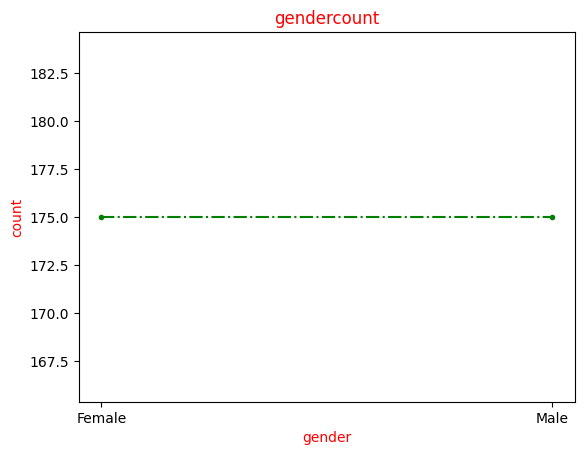

In [15]:
gender_count=df["gender"].value_counts()
import matplotlib.pyplot as plt
plt.plot(gender_count.index,gender_count.values,marker=".",linestyle="dashdot",color="green")
plt.title("gendercount",color="red")
plt.xlabel("gender",color="red")
plt.ylabel("count",color="red")
plt.show()

In [ ]:
#average age of customer
df["age"].mean().astype("int")

np.int64(33)

In [18]:
#unique membership
df["menbership_type"].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

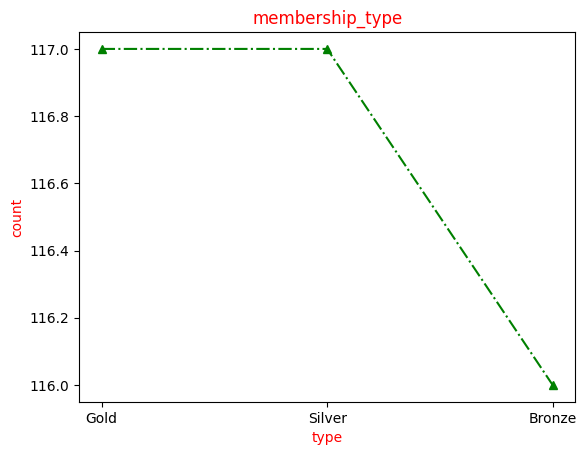

In [28]:
#membership wise count
membership=df["menbership_type"].value_counts()
import matplotlib.pyplot as plt
plt.plot(membership,marker="^",linestyle="dashdot",color="green")
plt.title("membership_type",color="red")
plt.xlabel("type",color="red")
plt.ylabel("count",color="red")
plt.show()


In [30]:
#membership wise total spend
df.groupby("menbership_type")["total_spend"].sum()

menbership_type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64

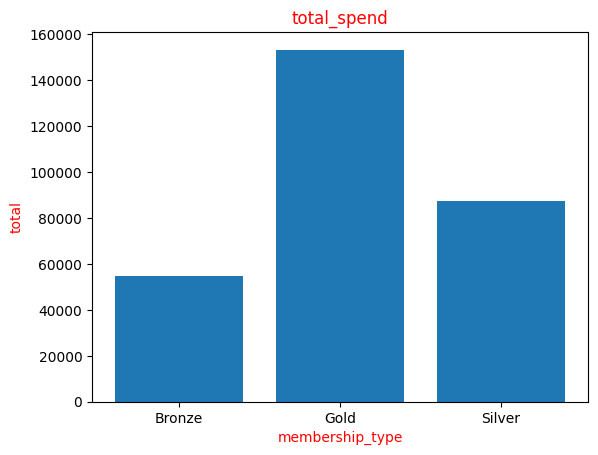

In [36]:
total_spend=df.groupby("menbership_type")["total_spend"].sum()
import matplotlib.pyplot as plt
plt.bar(total_spend.index,total_spend.values)
plt.title("total_spend",color="red")
plt.xlabel("membership_type",color="red")
plt.ylabel("total",color="red")
plt.show()

In [41]:
#details members of gold
df[df["menbership_type"]=="Gold"]

,customer_id,gender,age,city,menbership_type,total_spend,items_purchased,average_rating,discount_apllied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,Satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,Satisfied


In [42]:
#rating above 4.5
df[df["average_rating"]>4.5]

,customer_id,gender,age,city,menbership_type,total_spend,items_purchased,average_rating,discount_apllied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,Satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,Satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied


In [46]:
#customers per city 
df["city"].value_counts()

city
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

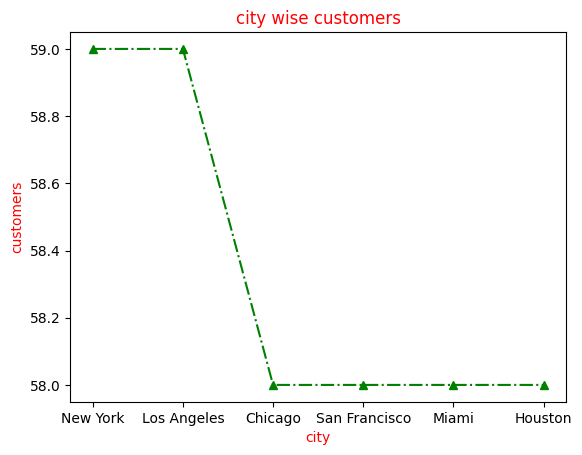

In [49]:
city=df["city"].value_counts()
import matplotlib.pyplot as plt
plt.plot(city.index,city.values,marker="^",linestyle="dashdot",color="green")
plt.title("city wise customers",color="red")
plt.xlabel("city",color="red")
plt.ylabel("customers",color="red")
plt.show()

In [50]:
#city wise total spend 
df.groupby("city")["total_spend"].sum()

city
Chicago          28993.2
Houston          25919.9
Los Angeles      47524.0
Miami            40042.6
New York         68737.1
San Francisco    84666.8
Name: total_spend, dtype: float64

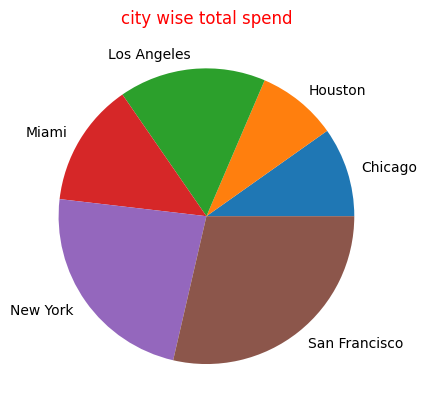

In [ ]:
city=df.groupby("city")["total_spend"].sum()
import matplotlib.pyplot as plt
plt.pie(city.values,labels=city.index)
plt.title("city wise total spend",color="red")
plt.show()

In [56]:
#city wise average rating
df.groupby("city")["average_rating"].mean()

city
Chicago          3.456897
Houston          3.193103
Los Angeles      4.172881
Miami            3.927586
New York         4.544068
San Francisco    4.808621
Name: average_rating, dtype: float64

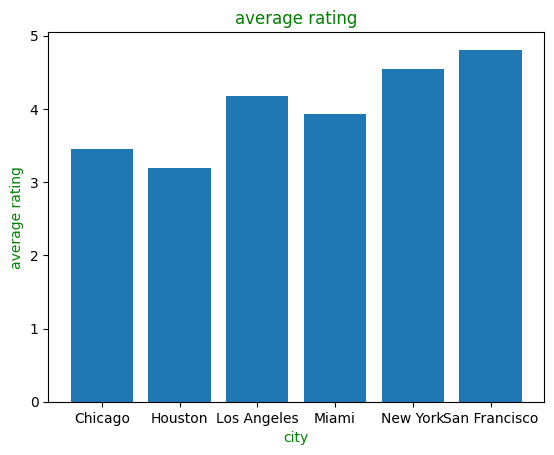

In [58]:
city=df.groupby("city")["average_rating"].mean()
import matplotlib.pyplot as plt
plt.bar(city.index,city.values)
plt.title("average rating",color="green")
plt.xlabel("city",color="green")
plt.ylabel("average rating",color="green")
plt.show()

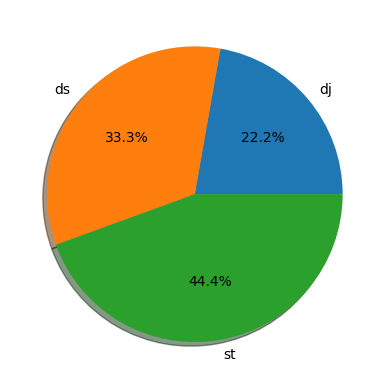

In [4]:
import matplotlib.pyplot as plt
batches=["dj","ds","st"]
head_count=[20,30,40]
plt.pie(head_count,labels=batches,autopct="%1.1f%%",shadow=True)
plt.show()

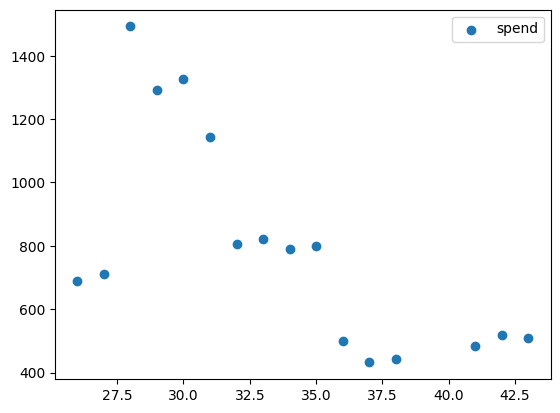

In [16]:
#agewise total spend
import matplotlib.pyplot as plt
age_total_spend=df.groupby("age")["total_spend"].mean()
age_total_spend
plt.scatter(age_total_spend.index,age_total_spend.values,label="spend")
plt.legend()

(array([ 69., 106.,  84.,  33.,  58.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. ]),
 <BarContainer object of 5 artists>)

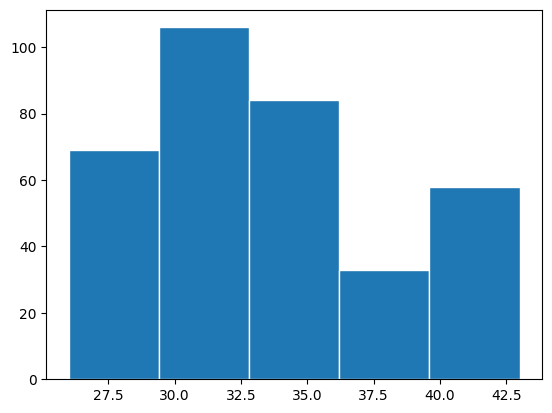

In [17]:
plt.hist(df["age"],bins=5,edgecolor="white")

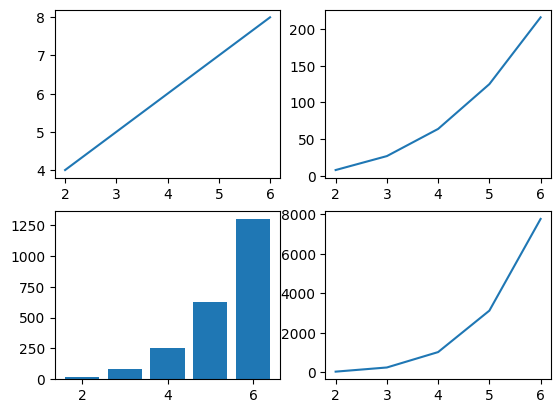

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)

x = np.array([2, 3, 4, 5, 6])

axes[0, 0].plot(x, x + 2)
axes[0, 1].plot(x, x**3)
axes[1, 0].bar(x, x**4)
axes[1, 1].plot(x, x**5)
plt.show()



{'whiskers': [<matplotlib.lines.Line2D at 0x11306d010>,
 'caps': [<matplotlib.lines.Line2D at 0x11306d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11306cec0>],
 'medians': [<matplotlib.lines.Line2D at 0x11306d550>],
 'fliers': [<matplotlib.lines.Line2D at 0x11306d6a0>],
 'means': []}

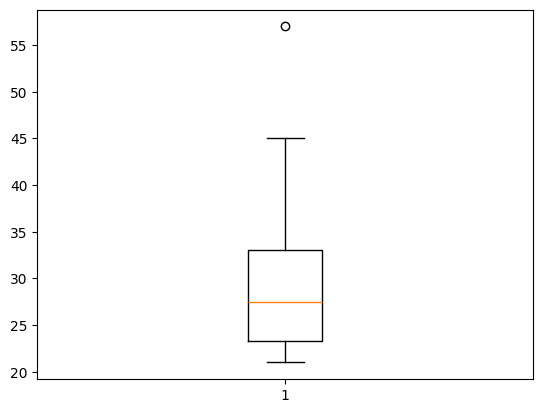

In [5]:
age=[21,23,24,25,27,28,57,23,34,35,45,21,29,30]
import matplotlib.pyplot as plt
plt.boxplot(age)